# Universidade de Brasília
## Instituto de Física
---
### Métodos Computacionais A (MCA) 
#### Prof. Bernhard Enders
---

# **➲ AULA 13.12: Diferenciação Numérica**

## Aproximações por Diferenças Finitas

A solução de uma equação diferencial (ED) implica na determinação dos valores da variável dependente em cada ponto do intervalo de interesse. Computacionalmente, podemos lidar apenas com uma região contínua se for possível determinar uma expressão analítica para a solução da equação diferencial. Nesse caso, o computador pode ser utilizado para calcular a solução em qualquer ponto desejado da região, com o uso da solução analítica. Contudo, no caso de técnicas numéricas de solução, não é possível tratar a região de interesse como contínua, já que, em geral, os métodos numéricos obtêm a solução do problema em pontos preestabelecidos. O processo de transformação do domínio contínuo em domínio discreto é chamado de discretização, onde o conjunto de pontos discretos escolhidos para representar o domínio de interesse é chamado de malha. A Figura abaixo mostra uma malha de pontos uniformemente espaçados, o passo da malha é definido como sendo a distância entre dois pontos adjacentes e é dado por $Δx = x_i − x_{i-1}$.

<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/malha.png" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Uma malha de pontos uniformemente espaçados.
  </p> 
  </center>
</div>

Para que seja possível tratar numericamente as equações diferenciais, elas devem ser expressas sob a forma de operações aritméticas que o computador possa executar. Essen- cialmente, devemos representar os operadores diferenciais (contínuos) presentes na ED por expressões algébricas (discretas), ou seja, devemos discretizar a ED. Portanto, antes de resolver a ED numericamente é preciso encontrar, para os termos que nela aparecem, as respectivas expressões escritas em função dos pontos (finitos) da malha. Essas expressões são denominadas aproximações por diferenças finitas. O resultado final desse processo é uma equação algébrica denominada equação de diferenças finitas (EDF). A EDF é escrita para cada ponto da região discretizada em que se deseja calcular a solução do problema. Resolvendo-se as EDFs, encontra-se a solução aproximada do problema. Tal solução não é exata devido a:

- erros inerentes ao processo de discretização das equação;
- erros de arredondamento nos cálculos feitos pelo computador;
- erros na aproximação numérica das condições auxiliares.  

Pode-se obter uma aproximação de diferenças finitas diretamente da definição de derivada de uma função $f$ contínua,

\begin{equation*}
\frac{df}{dx} = \lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}.
\end{equation*}

Para tanto, basta que $\Delta x$ assuma um valor fixo (não-nulo) — que chamaremos de $h$ — ao invés de tender a zero, para que o lado direito da equação represente uma aproximação (avançada) de diferenças finitas:

\begin{equation*}
\frac{df}{dx} \approx \frac{f(x+h)-f(x)}{h}.
\end{equation*}

Desse modo, utilizando-se dois valores de $f$ separados por uma distância (finita) $\Delta x$, a expressão representa uma aproximação algébrica para a primeira derivada de $f$. Essa situação está ilustrada na figura abaixo, onde os dois pontos, $x$ e $x+\Delta x$, afastados entre si por uma distância $\Delta x$, formam a reta secante cuja declividade serve de aproximação para a derivada da função $f$ no ponto $x$. Quando a separação $\Delta x$ diminui, a reta secante se aproxima da reta tangente (derivada real), melhorando assim o valor estimado para a derivada.


<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/derivada.png" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Aproximação da derivada primeira da função genérica f(x) no ponto x por uma reta secante.
  </p> 
  </center>
</div>

Aproximações de diferenças finitas, como a mostrada anteriormente, podem ser obtidas de várias formas. As técnicas mais comuns são a expansão em série de Taylor e a interpolação polinomial. O método da expansão em série de Taylor será utilizado na obtenção de aproximações de diferenças finitas de primeira e segunda ordem para as derivadas primeira, segunda e mista de uma função $f$. A técnica de interpolação é geralmente utilizada no contexto em que se faz necessário o uso de malhas cujo espaçamento não é uniforme.


## Aproximações para a derivada primeira


As aproximações de diferenças finitas têm como base a expansão em série de Taylor de uma função $f$. Supondo que $f$ seja contínua no intervalo $[a,b]$ de interesse e que possua derivadas até ordem $N$ contínuas nesse intervalo, o teorema de Taylor nos permite escrever, para todo ponto $x \in [a,b]$,

\begin{equation*}
f(x) = f(x_0) + (\Delta x)\left. \frac{df}{dx} \right|_{x_0} + \frac{{(\Delta x)^2 }}
{{2!}}\left. \frac{d^2 f}{dx^2} \right|_{x_0} + \frac{{(\Delta x)^3 }}
{{3!}}\left. \frac{d^3 f}{dx^3} \right|_{x_0 } +  \cdots  + R_N,
\end{equation*}

em que $\Delta x = x - x_0$ e $R_N$ é o resto (de Lagrange), definido como

\begin{equation*}
R_N = \frac{{(\Delta x)^N}}{{N!}}\left.\frac{d^Nf}{dx^N}\right|_\xi,\quad\xi\in [a,b].
\end{equation*}

Para aproximar a derivada primeira de uma função $f$ no ponto $x_i$ vamos expandir $f(x_i+\Delta x)$ em série de Taylor em torno do ponto $x_i$,

\begin{equation*}
f(x_i  + \Delta x) = f(x_i) + (\Delta x)\left. {\frac{df}{dx}} \right|_{x_i}  + \frac{{(\Delta x)^2 }}
{{2!}}\left. \frac{d^2 f}{dx^2} \right|_{x_i}  + \frac{{(\Delta x)^3 }}
{{3!}}\left. {\frac{d^3 f}{dx^3}} \right|_{x_i}  +  \cdots\,,
\end{equation*}

onde as reticências indicam os termos restantes da série de Taylor até o resto $R_N$. Após isolar a primeira derivada, podemos escrever

\begin{equation*}
\left. {\frac{df}{dx}} \right|_{x_i}  = \frac{{f(x_i  + \Delta x) - f(x_i )}}
{{\Delta x}} + \left[ { - \frac{{(\Delta x)}}
{{2!}}\left. {\frac{d^2 f}{dx^2}} \right|_{x_i}  - \frac{{(\Delta x)^2 }}
{{3!}}\left. {\frac{d^3 f}{dx^3}} \right|_{x_i}  -  \cdots } \right].
\end{equation*}

Note que, para isolar a primeira derivada, todos os termos da série de Taylor foram divididos pelo espaçamento $\Delta x$. Podemos então dizer que a primeira derivada é igual ao quociente

\begin{equation*}
\frac{{f(x_i + \Delta x) - f(x_i )}}{{\Delta x}},
\end{equation*}

mais o erro local de truncamento (ELT), dado por:

\begin{equation*}
\left[ { - \frac{{(\Delta x)}}
{{2!}}\left. {\frac{d^2 f}{dx^2}} \right|_{x_i}  - \frac{{(\Delta x)^2 }}
{{3!}}\left. {\frac{d^3 f}{dx^3}} \right|_{x_i}  -  \cdots } \right].
\end{equation*}

O ELT aparece naturalmente devido à utilização de um número finito de termos na série de Taylor. Como não podemos tratar os infinitos termos dessa série na aproximação numérica para a derivada de $f$, a série foi truncada a partir da derivada de segunda ordem inclusive. O \ELT fornece uma medida da diferença entre o valor exato da derivada e sua aproximação numérica, indicando também que essa diferença varia linearmente com a redução do espaçamento $\Delta x$, isto é, com o refinamento da malha. Assim, para reduzirmos o erro por quatro, por exemplo, devemos utilizar um espaçamento 1/4 do original e portanto, quatro vezes mais pontos na malha. Dessa forma, os termos do \ELT serão representados por $\mathcal O(\Delta x)$. Deve-se notar que uma expressão do tipo $\mathcal O(\Delta x)$ só indica como \ELT varia com o refinamento da malha, e não o valor do erro.

Podemos simplificar a notação se escrevendo $f_i$ para $f(x_i)$ e $f'_i$ para $f'(x_i)$ ou, em geral, $f_{i\pm k}$ para $f(x_i\pm k\Delta x)$. Com isso, a equação anterior torna-se:

\begin{equation*}
f'_i  = \frac{{f_{i + 1}  - f_i }}{h} + \mathcal O(h),
\end{equation*}

na qual usamos a identidade $h = \Delta x$. Esta é uma equação de diferenças finitas que representa uma aproximação de primeira ordem para a primeira derivada de $f$, utilizando diferença avançada, visto que no cálculo da derivada no ponto $x_i$ foi utilizado um ponto adiante de $x_i$, no caso, $x_{i+1}$. A declividade (primeira derivada) de $f$ em $x_i$ é aproximada pela declividade da reta secante formada pelos pontos $(x_i,f_i)$ e $(x_{i+1},f_{i+1})$, conforme mostra a figura abaixo.

<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/avancada.png" width="500" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Pontos utilizados na aproximação para a primeira derivada de f(x) por diferença avançada.
  </p> 
  </center>
</div>

Uma segunda aproximação de diferenças finitas pode ser obtida a partir da expansão de $f(x_i-\Delta x)$ em série de Taylor em torno do ponto $x_i$:

\begin{equation*}
f(x_i  - \Delta x) = f(x_i ) - (\Delta x)\left. {\frac{df}{dx}} \right|_{x_i}  + \frac{{(\Delta x)^2 }}
{{2!}}\left. {\frac{d^2f}{dx^2}} \right|_{x_i}  + \mathcal O(\Delta x)^3.
\end{equation*}

Isolando a primeira derivada e simplificando a notação, temos

\begin{equation*}
f'_i = \frac{{f_i  - f_{i - 1} }}{h} + \mathcal O(h),
\end{equation*}

que é outra aproximação de primeira ordem para a primeira derivada de $f$. Diferentemente da fórmula avançada, na qual utiliza-se um ponto adiante de $x_i$, a fórmula atrasada utiliza o ponto $x_{i-1}$, ponto este anterior a $x_i$. Por essa razão, essa equação de diferenças é chamada de aproximação por diferenças atrasadas. A \Figref[vref]{atrasada} mostra os pontos utilizados nessa aproximação. A declividade da função~$f$ no ponto $x_i$ é aproximada pela declividade da reta secante aos pontos $(x_{i-1},f_{i-1})$ e $(x_{i},f_{i})$.


<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/atrasada.png"  width="500" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Pontos utilizados na aproximação para a primeira derivada de f(x) por diferença atrasada.
  </p> 
  </center>
</div>


Até agora obtivemos somente aproximações de primeira ordem para a derivada primeira de $f$, uma aproximação de $\mathcal O(\Delta x)^2$ ainda para a primeira derivada pode ser obtida ao subtrairmos as expansões em série de Taylor representadas pelas fórmulas anteriores:
\begin{equation*}
f(x_i  + \Delta x) - f(x_i  - \Delta x) = 2(\Delta x)\left. {\frac{df}{dx}} \right|_{x_i}  + \mathcal O(\Delta x)^3,
\end{equation*}

ou, isolando a derivada,

\begin{equation*}
f'_i = \frac{{f_{i+1} - f_{i-1}}}{2h} + \mathcal O(h)^2.
\end{equation*}

Note que a aproximação dada pela fórmula central utiliza os pontos $x_{i-1}$ e $x_{i+1}$ para o cálculo da primeira derivada de $f$ no ponto central $x_i$. Por essa razão, ela é denominada aproximação por diferenças centrais. Neste caso, conforme mostra a figura a seguir, a derivada de $f$ em $x_i$ é aproximada pela declividade da reta secante que passa pelos pontos $(x_{i-1},f_{i-1})$ e $(x_{i+1},f_{i+1})$.


<div style="margin:auto; text-align:center; width:75%;">
  <center>
  <img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/central.png"  width="500" align="center"/>
  <p style="text-align:center; font-style:italic;">
    Pontos utilizados na aproximação de segunda ordem para a primeira derivada de f(x) por diferença central.
  </p> 
  </center>
</div>

No caso de aproximações de segunda ordem, reduções sucessivas no passo $\Delta x$ da malha provocam uma redução quadrática no erro da aproximação da primeira derivada de $f$ pela aproximação central. Ao dividirmos o passo por dois, por exemplo, o erro é dividido por quatro, sem precisarmos de quatro vezes mais pontos, como nas expressões de primeira ordem. Isso é uma propriedade extremamente útil, já que, com menor número de pontos e, portanto, menor esforço computacional, podemos conseguir uma aproximação melhor que aquelas fornecidas pelas fórmulas atrasadas e avançadas.

Em resumo, as três fórmulas para a primeira derivada de $f$ deduzidas anteriormente, a partir da expansão em série de Taylor, são:

\begin{align*}
f'_i &\approx \frac{f_{i+1} - f_i}{h}, && \textsf{fórmula avançada de $\mathcal O(h)$}\\
f'_i &\approx \frac{f_{i} - f_{i-1}}{h}, && \textsf{fórmula atrasada de $\mathcal O(h)$}\\
f'_i &\approx \frac{f_{i+1} - f_{i-1}}{2h}. && \textsf{fórmula central de $\mathcal O(h)^2$}
\end{align*}


## Fórmulas de ordem mais alta

A princípio, quanto mais pontos tomarmos para a aproximação da derivada mais precisa será a aproximação. Até agora utilizamos apenas dois pontos nas aproximações anteriores. Vamos propor uma aproximação para a derivada primeira de $f(x)$ no ponto $x_i$ que utiliza a informação de dois pontos antes e dois pontos após. Para tanto faremos uso, mais uma vez, da expansão em série de Taylor em torno do ponto $x_i$ para as seguintes funções: 

\begin{align*}
f(x_{i-2}) &= f(x_i) - 2hf'(x_i) + 2h^2f''(x_i) - \frac{4h^3}{3}f'''(x_i) + \frac{2h^4}{3}f''''(x_i) - \mathcal O(h^5)\\
f(x_{i+2}) &= f(x_i) + 2hf'(x_i) + 2h^2f''(x_i) + \frac{4h^3}{3}f'''(x_i) + \frac{2h^4}{3}h^4f''''(x_i) + \mathcal O(h^5)\\
f(x_{i+1}) &= f(x_i) + hf'(x_i) + \frac{h^2}{2}f''(x_i) + \frac{h^3}{6}f'''(x_i) + \frac{h^4}{24}f''''(x_i) + \mathcal O(h^5)\\
f(x_{i-1}) &= f(x_i) - hf'(x_i) + \frac{h^2}{2}f''(x_i) - \frac{h^3}{6}f'''(x_i) + \frac{h^4}{24}f''''(x_i) - \mathcal O(h^5)
\end{align*}

Fazendo $f(x_{i−2}) - 8f(x_{i−1}) + 8f(x_{i+1}) - f(x_{i+2})$ e isolando $f'(x_{i})$, obtemos uma aproximação para a primeira derivada com ELT da ordem de $h^5$: 

$$
f´_i  \approx \frac{f_{i-2} - 8f_{i−1} + 8f_{i+1} - f_{i+2}}{12h} + \mathcal O(h^5)
$$

## Implementação em Python

Vamos agora implementar as aproximações obtidas aqui em um módulo python.

In [1]:
'''
Module for computing derivative approximations using finite difference methods.
'''


def forward(f, x, h=2**-20):
    return (f(x+h) - f(x))/h


def forward_discrete(xi, yi):
    h = xi[1] - xi[0]
    d = []
    for i in range(len(yi)-1):
        d.append((yi[i+1] - yi[i])/h)
    return d


def backward(f, x, h=2**-20):
    return (f(x) - f(x-h))/h


def backward_discrete(xi, yi):
    h = xi[1] - xi[0]
    d = []
    for i in range(1, len(yi)):
        d.append((yi[i] - yi[i-1])/h)
    return d


def central(f, x, h=2**-20):
    return 0.5*(f(x+h) - f(x-h))/h


def central_discrete(xi, yi):
    h = xi[1] - xi[0]
    d = []
    for i in range(1, len(yi)-1):
        d.append((yi[i+1] - yi[i-1])/(2*h))
    return d


def high_order(f, x, h=2**-10):
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12*h)


def high_order_discrete(xi, yi):
    h = xi[1] - xi[0]
    d = []
    for i in range(2, len(yi)-2):
        d.append((yi[i-2] - 8*yi[i-1] + 8*yi[i+1] - yi[i+2])/(12*h))
    return d


In [2]:
import math
import numpy as np

x0 = math.pi


def f(x):
    return np.sin(1/x)


def g(x):
    return x*x


In [3]:
high_order(f, x0)


-0.0962313864653576

In [4]:
central(f, x0)


-0.09623138647293672

In [5]:
forward(f, x0)


-0.09623135882429779

In [6]:
backward(f, x0)


-0.09623141412157565

In [7]:
xi = np.linspace(0.125, 1, 1024)
yi = f(xi)


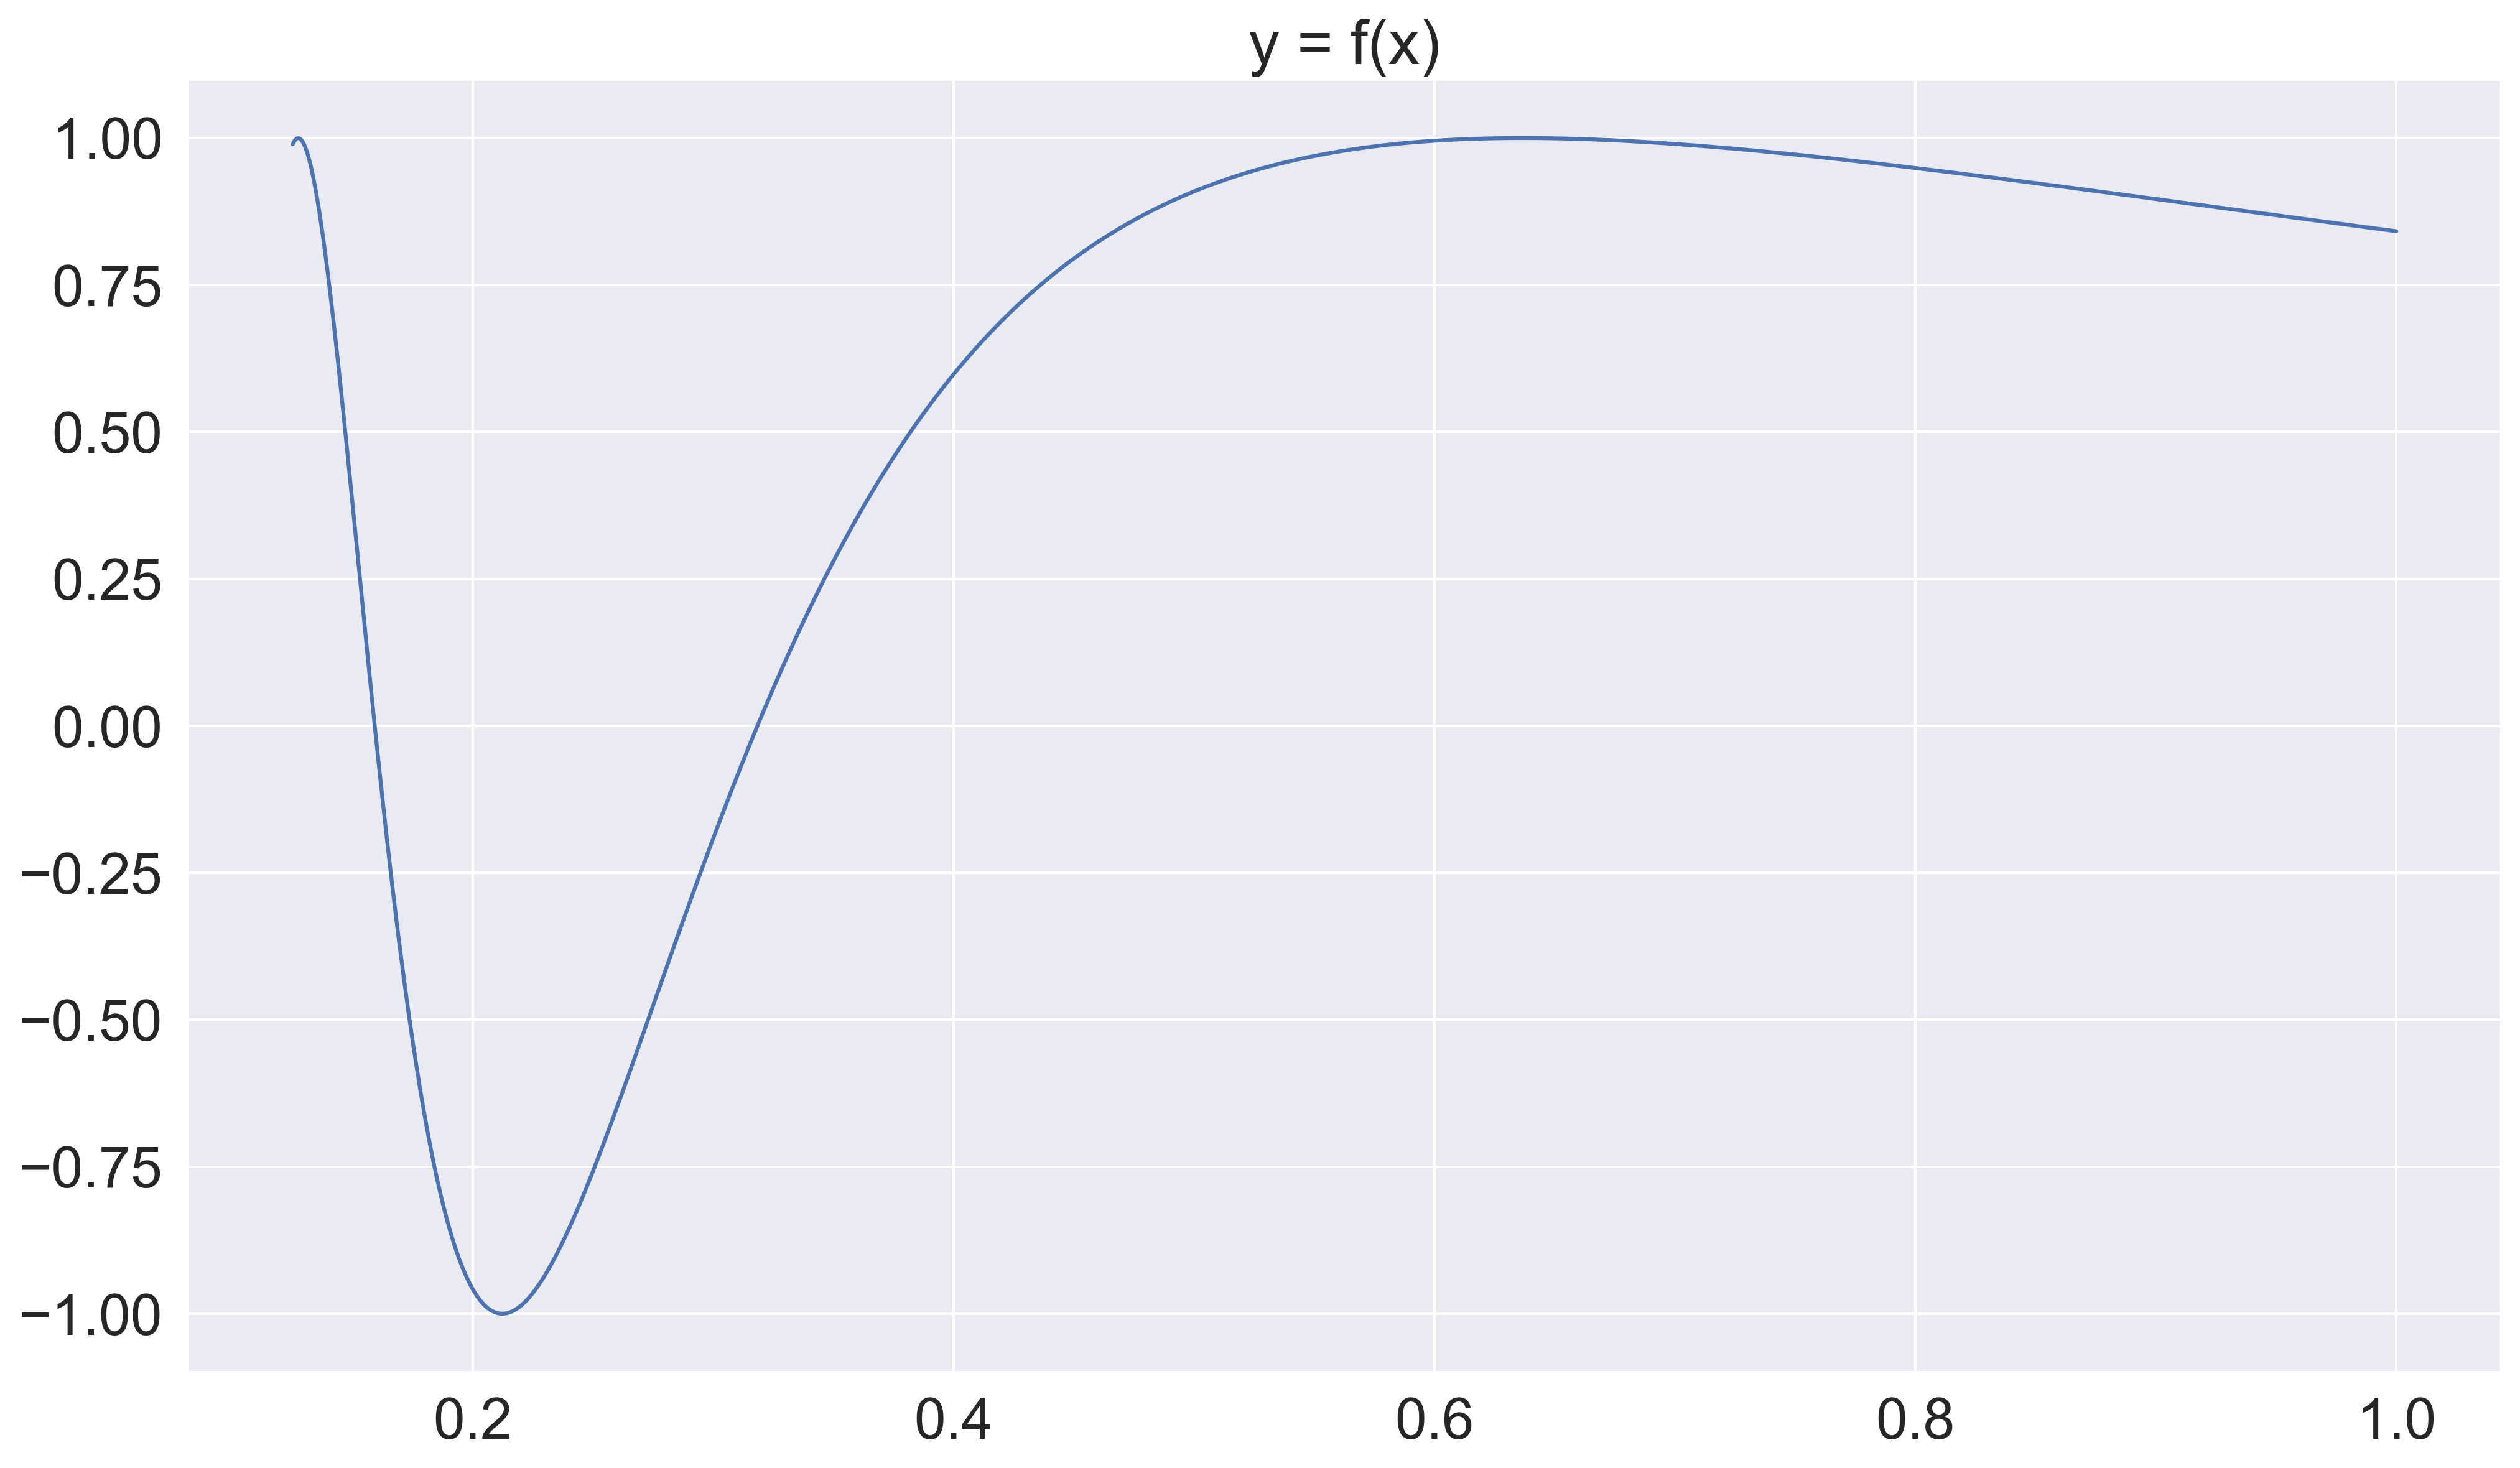

In [77]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
sns.set(font="Verdana")
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(16,9), dpi=300)
ax.plot(xi, yi)
ax.set(title='y = f(x)')
plt.show()

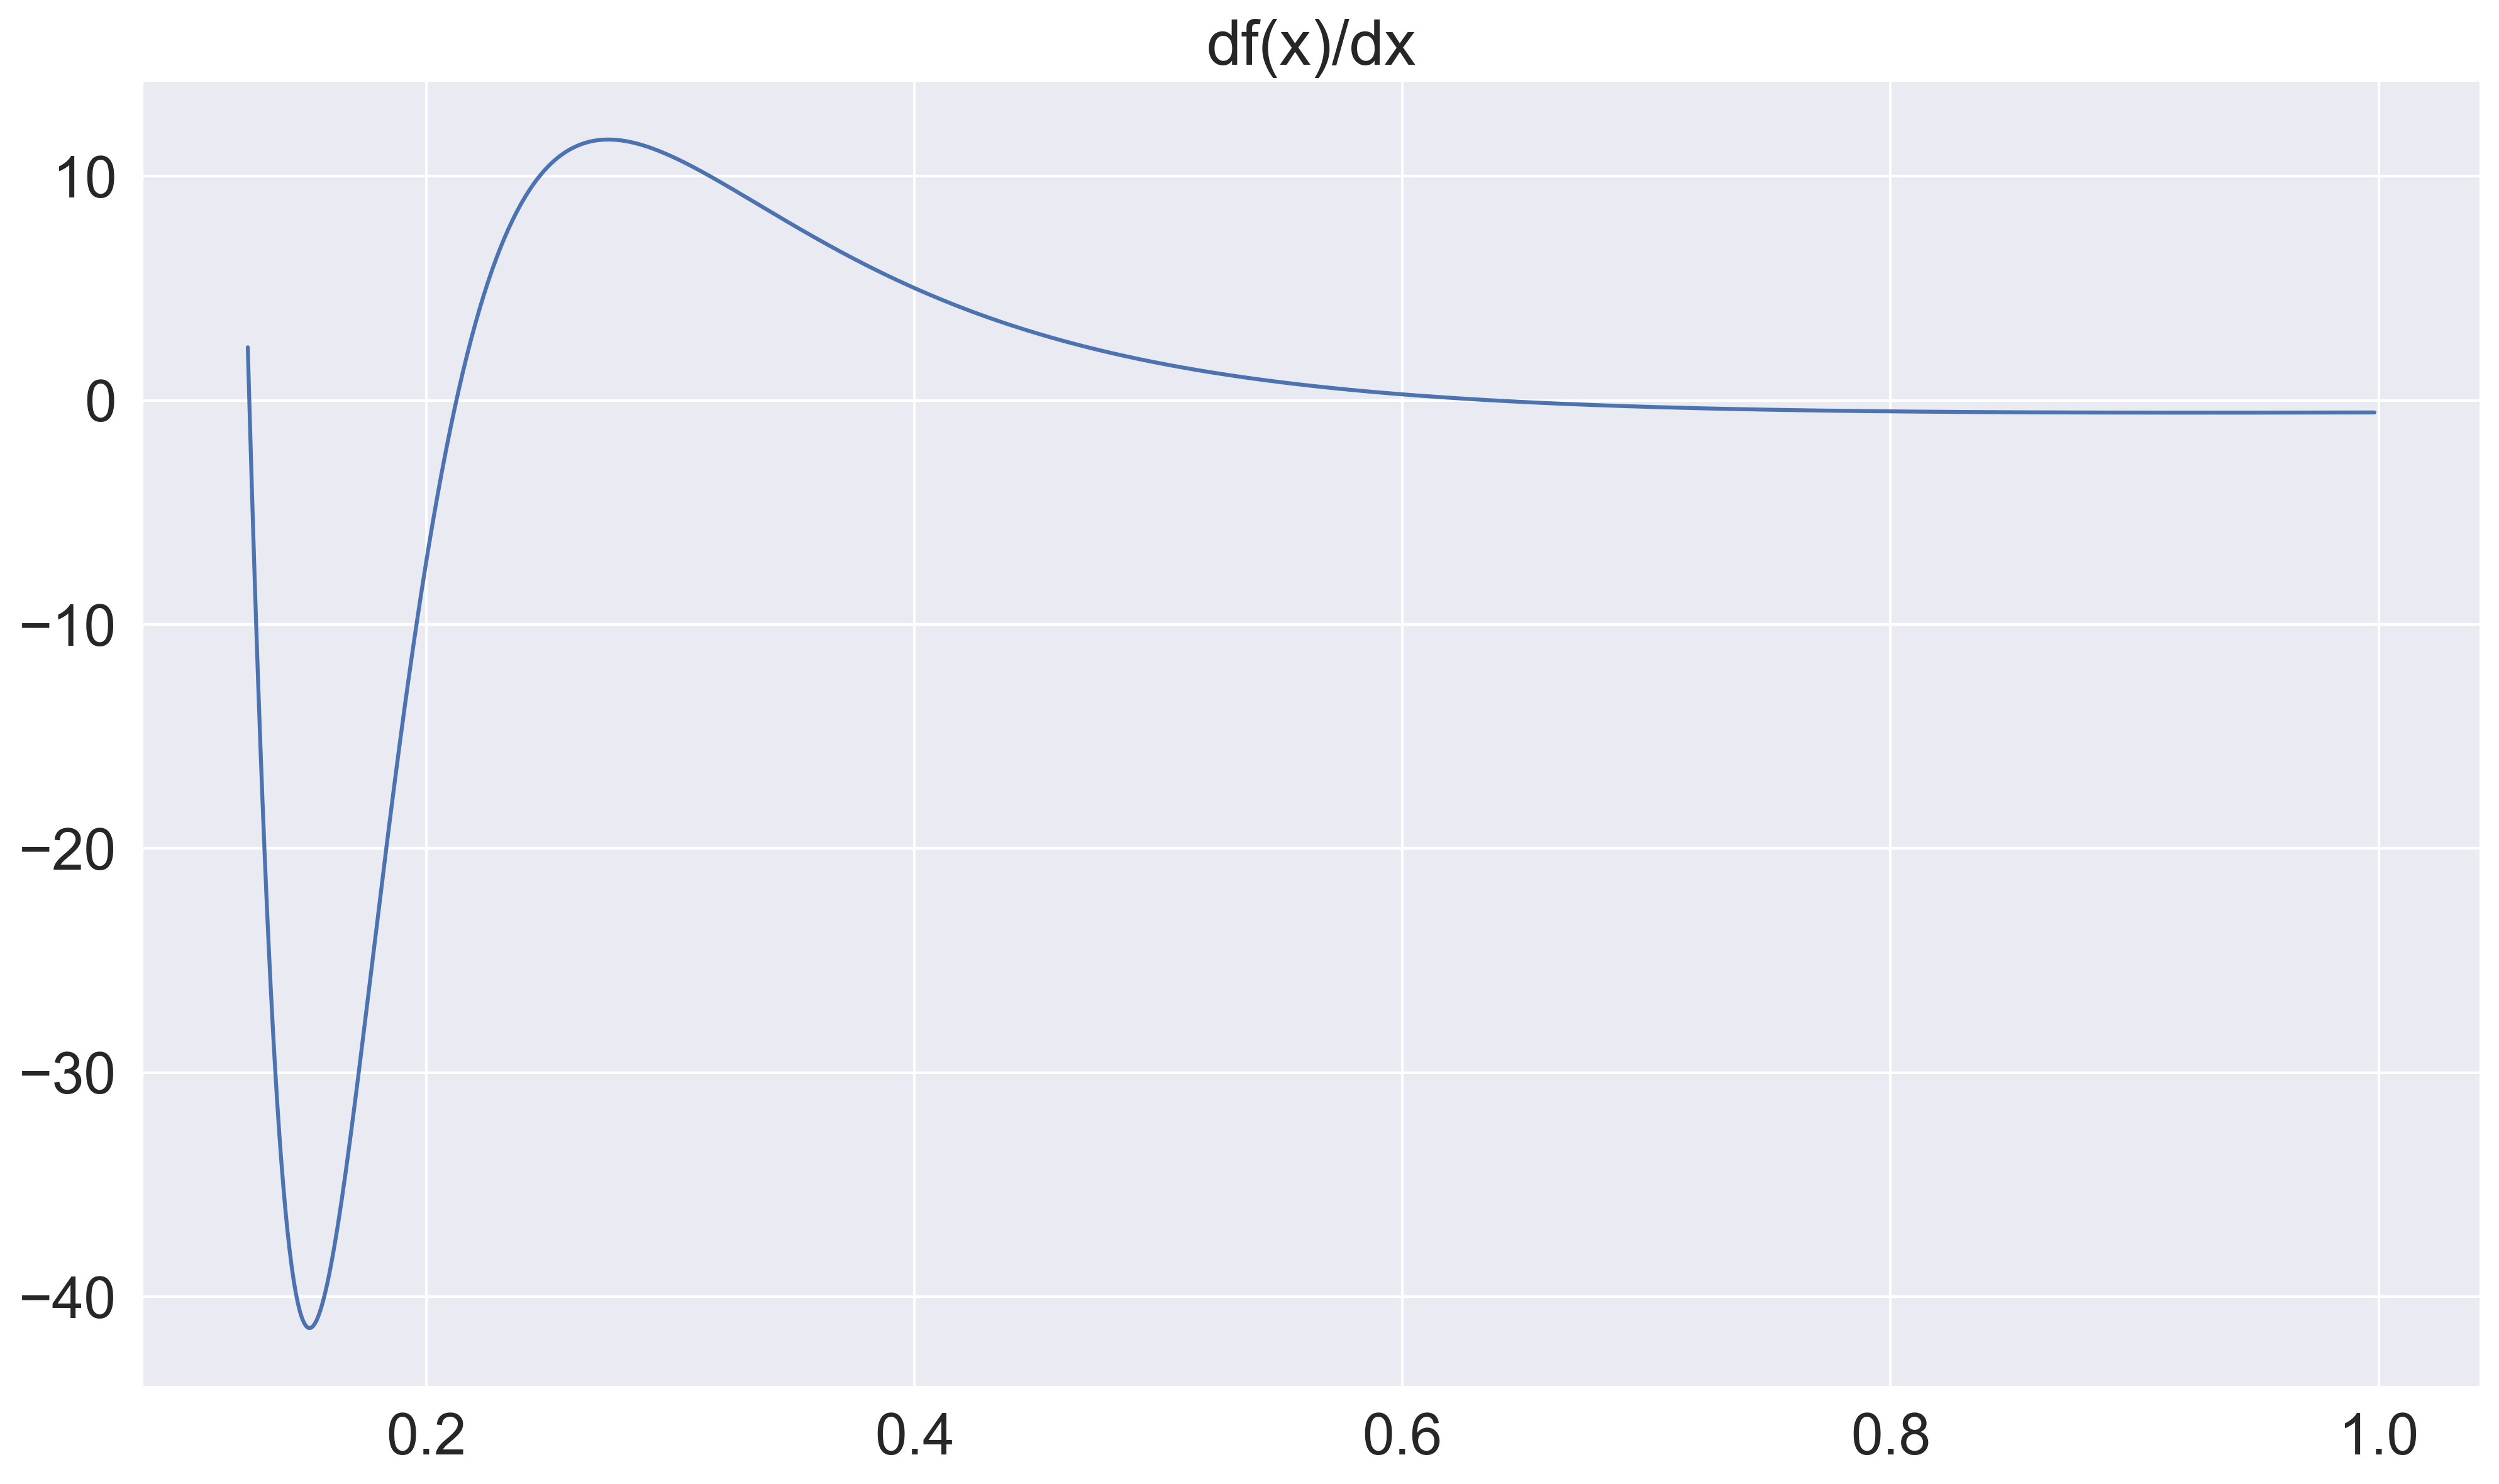

In [79]:
dyi = high_order_discrete(xi, yi)

fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.plot(xi[2:-2], dyi)
plt.title("df(x)/dx")
plt.show()


## Análise de erro

Apesar das equações de diferenças finitas obtidas anteriormente sugerirem que a redução do passo $\Delta x$ melhora a qualidade da aproximação para a derivada, isso só é verdade até certo ponto, na prática a redução do espaçamento da malha é limitada pelos erros de arredondamento. Erros de arredondamento estão presentes na solução numérica de um problema devido à aritmética de precisão finita utilizada pelos computadores. No método de diferenças finitas (MDF), se o passo da malha for demasiadamente pequeno, os erros de arredondamento nos cálculos passam a dominar o erro local de truncamento das expressões de diferenças finitas, e o erro relativo percentual efetivamente aumenta. Para ilustrar esse fato vamos calcular numericamente a derivada primeira da função $f(x) = x\text{e}^x$ no ponto $x=2$ utilizando a equação de diferenças centrais de segunda ordem. Sabemos que a derivada dessa função é $f'(x)=(x+1)\text{e}^x$, vamos utilizar o valor exato de $f'(2)$ para calcular o erro relativo das aproximações realizadas com os diferentes $\Delta x$. O erro relativo percentual, dado por

\begin{equation*}
E_\text{rel} = \left|\frac{\text{valor exato $-$ valor aproximado}}{\text{valor exato}}\right|\cdot 100,
\end{equation*}

diminui quadráticamente cada vez que $\Delta x$ é reduzido pela metade.

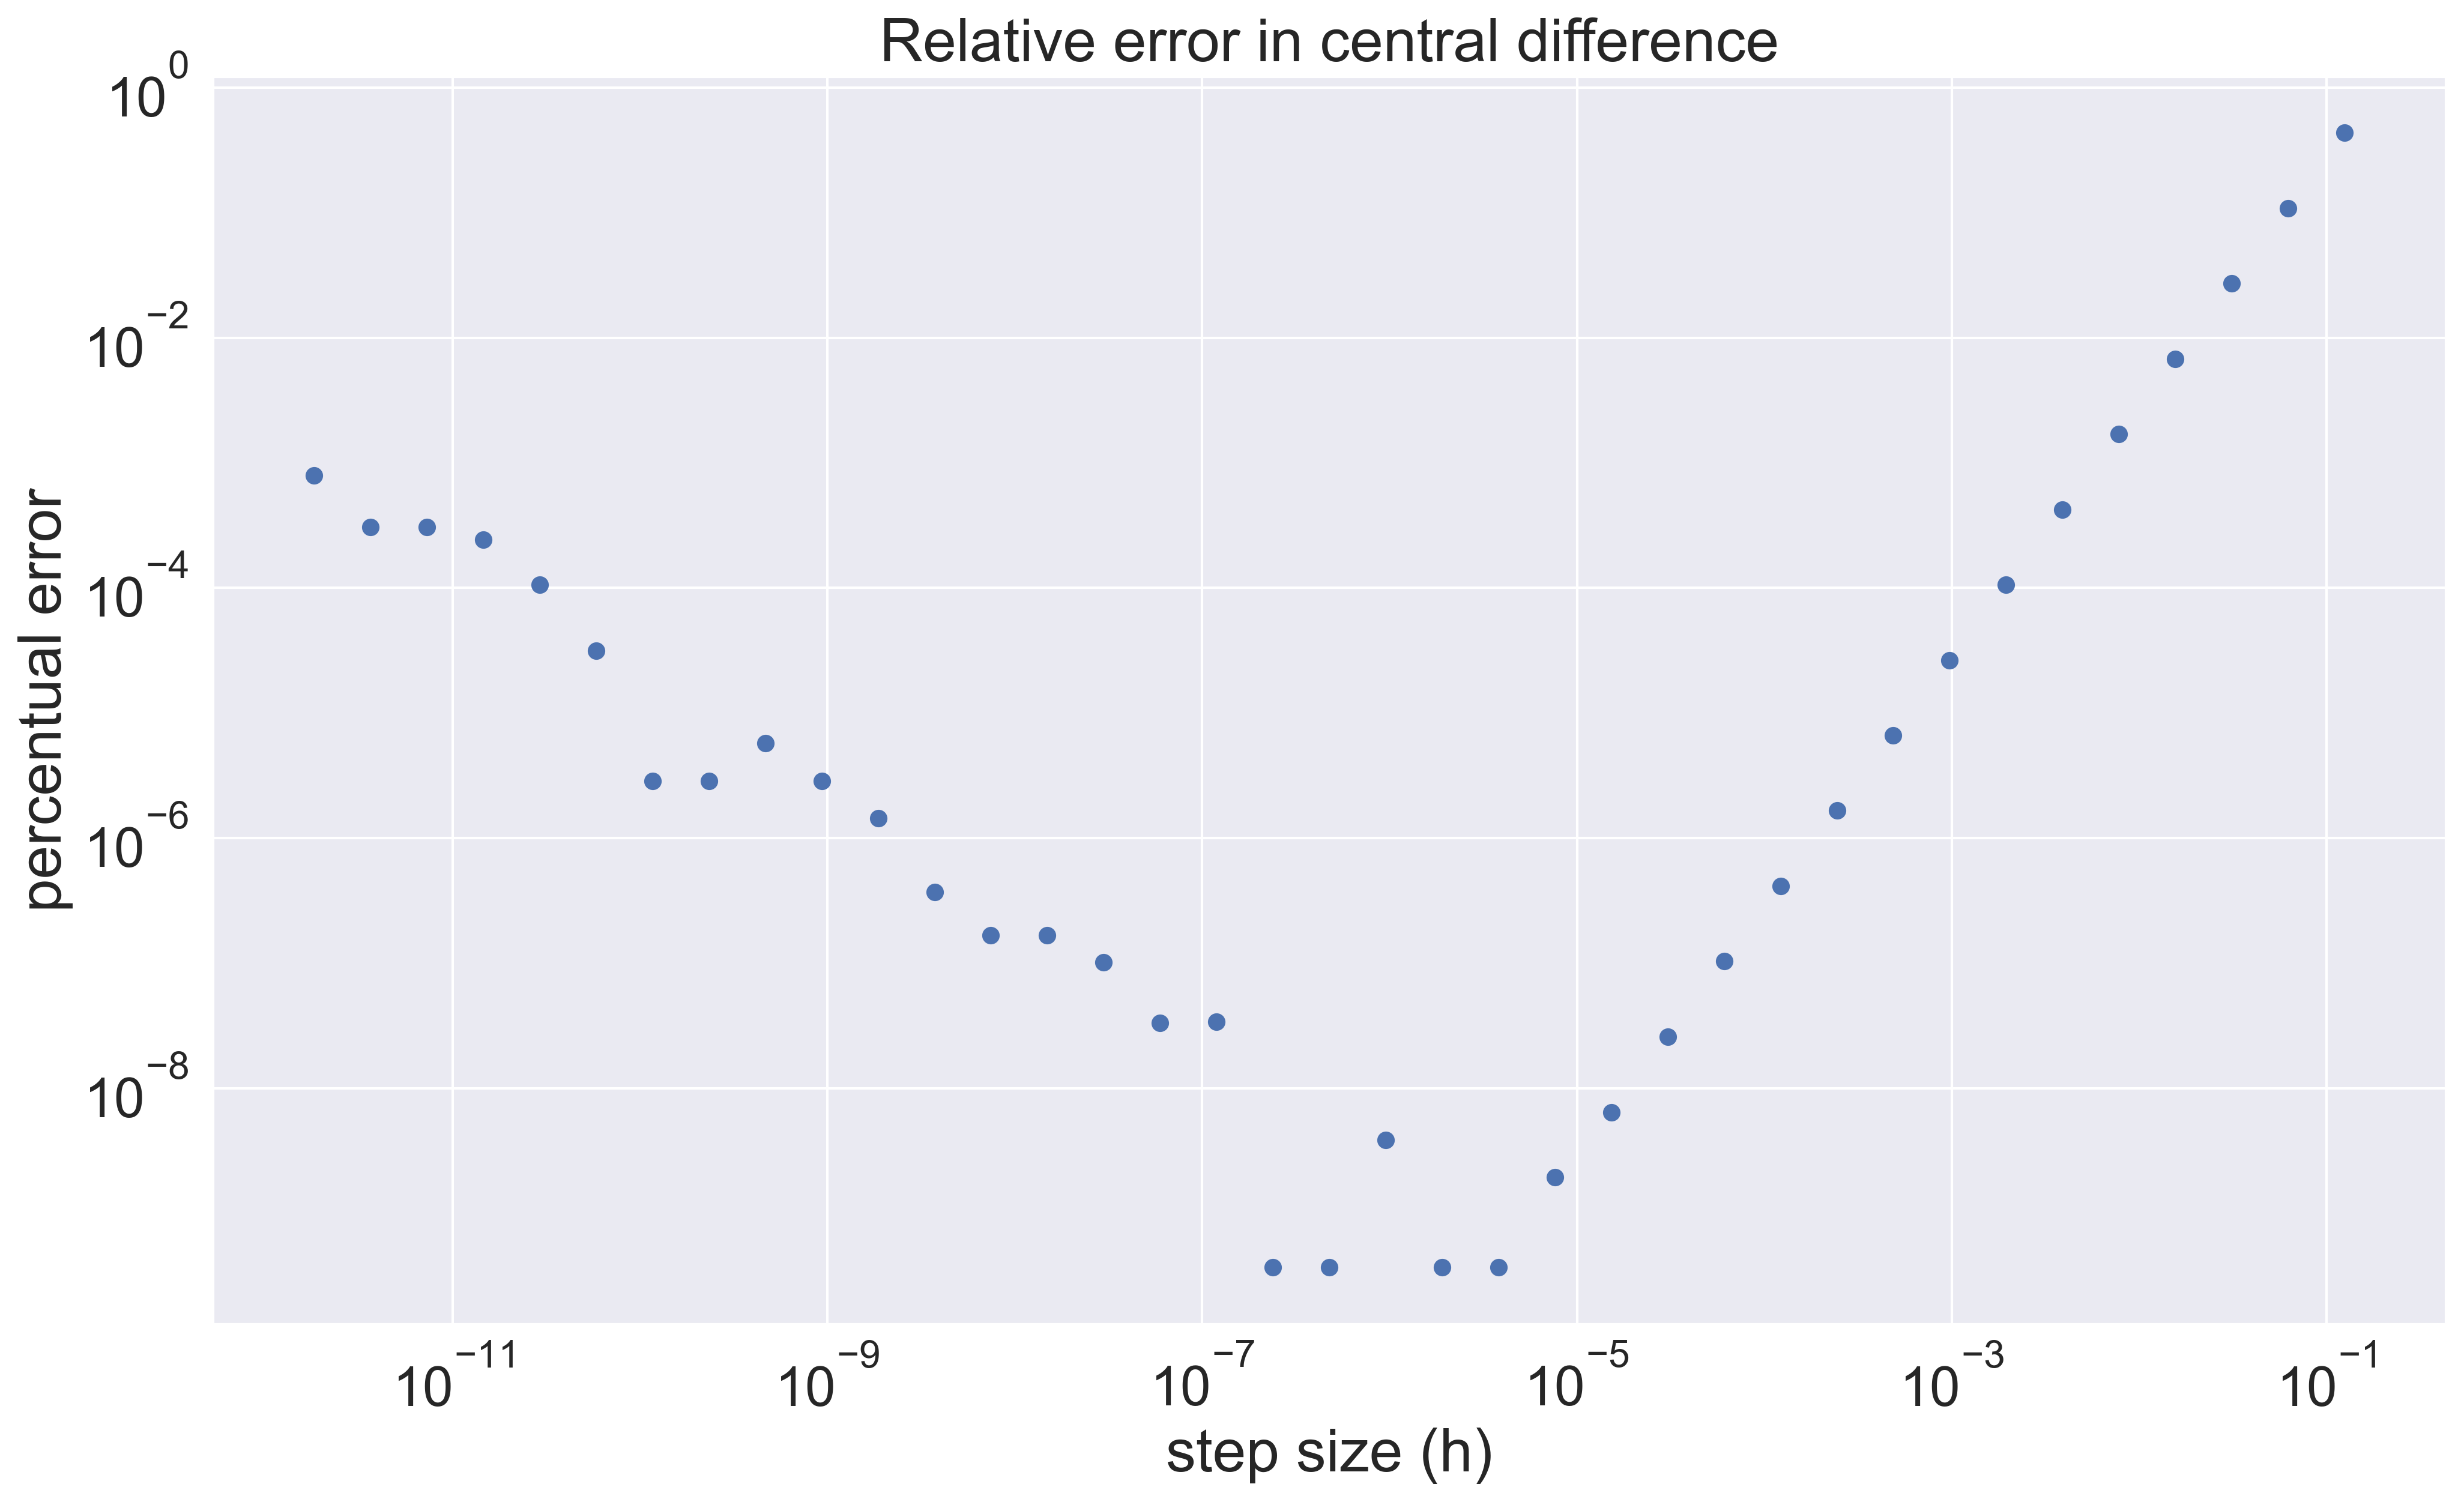

In [81]:
def f(x):
    '''our test funcion f'''
    return x*np.exp(x)


def df(x):
    '''derivative of f'''
    return (x+1)*np.exp(x)


# derivative of f at x0
x0 = 2

# steps to use
hs = [2**-i for i in range(3, 40)]

errel = []
for h in hs:
    errel.append(100*abs(central(f, x0, h) - df(x0))/df(x0))

fig, ax = plt.subplots(figsize=(16,9), dpi=300)
ax.scatter(hs, errel)
ax.set(title='Relative error in central difference') 
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("step size (h)")
plt.ylabel("percentual error")
plt.show()


## Aproximações para a derivada segunda

Expressões para derivadas de ordem superior podem ser obtidas com o mesmo procedimento com o qual obtivemos as fórmulas para a derivada primeira, isto é, por meio de manipulações adequadas da série de Taylor. Como exemplo, vamos determinar uma aproximação de diferenças centrais de segunda ordem para a segunda derivada de $f$. Para tal vamos utilizar ainda as expansões em série de Taylor anteriores. Queremos combiná-las para que a primeira derivada de $f$ seja eliminada, pois estamos interessados na segunda derivada. Por sua vez, as derivadas de ordem superior a dois que permanecerem na expansão farão parte do ELT. Assim,

\begin{equation*}
f(x_i + \Delta x) - f(x_i - \Delta x) = 2f(x_i) + (\Delta x)^2 \left.\frac{d^2f}{dx^2}\right|_{x_i} + \mathcal O(\Delta x)^4.
\end{equation*}

Rearranjando os termos, obtemos

\begin{equation*}
f''_i  = \frac{{f_{i + 1}  - 2f_i  + f_{i - 1} }}
{{h^2}} + \mathcal O(h^2),
\end{equation*}

que é a fórmula de diferenças finitas centrais de segunda ordem para derivadas segundas. Esta expressão é a aproximação mais comum encontrada na literatura para derivadas de segunda ordem.

Aproximações de diferenças avançadas e atrasadas de $\mathcal O(\Delta x)$ para a segunda derivada podem ser obtidas manipulando-se convenientemente as expansões de $f(x_i\pm\Delta x)$ e $f(x_i\pm 2\Delta x)$, nesse caso toma-se os sinais positivos para a aproximação avançada e os negativos para a atrasada. Aproximações avançadas e atrasadas de ordem superior podem também ser obtidas pelas expansões em série de Taylor, simplesmente utilizando mais termos dessa série.

Nos casos em que o problema é dependente do tempo devemos considerar a expansão em série de Taylor de uma função de duas variáveis independentes, supondo que $f=f(x,t)$, a expansão em torno do ponto $x_i$ fornece:

\begin{gather*}
f(x_i + \Delta x, t) = f(x_i, t) + (\Delta x)\left.\frac{\partial f}{\partial x}\right|_{x_i} +
\frac{{(\Delta x)^2}}{{2!}}\left.\frac{\partial^2f}{\partial x^2}\right|_{x_i} + \cdots\,, \\
f(x_i - \Delta x, t) = f(x_i, t) - (\Delta x)\left.\frac{\partial f}{\partial x}\right|_{x_i} +
\frac{{(\Delta x)^2}}{{2!}}\left.\frac{\partial^2f}{\partial x^2}\right|_{x_i} + \cdots\,.
\end{gather*}

Assim, podemos gerar aproximações de primeira ou segunda ordem para as
derivadas parciais, como por exemplo:

\begin{align*}
\left.\frac{\partial f}{\partial x}\right|_{x_i} &= \frac{{f(x_i + \Delta x, t) - f(x_i, t)}}{\Delta x} + \mathcal O(\Delta x), && \text{(avançada)}\\[6pt]
\left.\frac{\partial f}{\partial x}\right|_{x_i} &= \frac{{f(x_i, t) - f(x_i - \Delta x, t)}}{\Delta x} + \mathcal O(\Delta x), && \text{(atrasada)}\\[6pt]
\left.\frac{\partial f}{\partial x}\right|_{x_i} &= \frac{{f(x_i + \Delta x, t) - f(x_i - \Delta x, t)}}{{2\Delta x}} + \mathcal O(\Delta x)^2 && \text{(central)}\\
\left.\frac{\partial^2f}{\partial x^2}\right|_{x_i} &= \frac{{f(x_i + \Delta x, t) - 2f(x_i, t) + f(x_i - \Delta x, t)}}{{\Delta x^2}} + \mathcal O(\Delta x)^2. && \text{(central)}
\end{align*}

É fácil mostrar que existem expressões equivalentes para o tempo, ou seja,

\begin{align*}
\left.\frac{\partial f}{\partial t}\right|_{t_i} &= \frac{{f(x, t_i+\Delta t) - f(x, t_i)}}{\Delta t} + \mathcal O(\Delta t), && \text{(avançada)}\\[6pt]
\left.\frac{\partial f}{\partial t}\right|_{t_i} &= \frac{{f(x, t_i) - f(x, t_i-\Delta t)}}{\Delta t} + \mathcal O(\Delta t), && \text{(atrasada)}\\[6pt]
\left.\frac{\partial f}{\partial t}\right|_{t_i} &= \frac{{f(x, t_i + \Delta t) - f(x, t_i - \Delta t)}}{{2\Delta t}} + \mathcal O(\Delta t)^2 && \text{(central)}\\
\left.\frac{\partial^2 f}{\partial t^2}\right|_{t_i} &= \frac{{f(x, t_i + \Delta t) - 2f(x, t_i) + f(x, t_i - \Delta t)}}{{\Delta t^2}} + \mathcal O(\Delta t)^2. && \text{(central)}
\end{align*}

Com as expansões em série de Taylor de $f(x,y)$ em torno do ponto $(x_i,y_j)$ — em que o índice $j$ está associado à coordenada $y$ —, podemos também determinar expressões envolvendo derivadas parciais mistas com outras variáveis espaciais, isto é, do tipo $\frac{\partial^2f}{\partial x\partial y}$.

Como estamos interessados agora em obter uma expressão que relacione a variação de $f$ com incrementos em $x$ e $y$, simultaneamente, devemos utilizar a expansão em série de Taylor de funções de duas variáveis, dada por:

\begin{equation*}
\begin{split}
f(x_i  + \Delta x,y_j  + \Delta y) &= f(x_i ,y_j ) + (\Delta x)\left. {\frac{{\partial f}}
{{\partial x}}} \right|_{x_i ,y_j }  + (\Delta y)\left. {\frac{{\partial f}}
{{\partial y}}} \right|_{x_i ,y_j }  + \frac{{(\Delta x)^2 }}
{{2!}}\left. {\frac{{\partial ^2 f}}
{{\partial x^2 }}} \right|_{x_i ,y_j } \\
&\quad+ 2\frac{{(\Delta x)(\Delta y)}}
{{2!}}\left. {\frac{{\partial ^2 f}}
{{\partial x\partial y}}} \right|_{x_i ,y_j }  + \frac{{(\Delta y)^2 }}
{{2!}}\left. {\frac{{\partial ^2 f}}
{{\partial y^2 }}} \right|_{x_i ,y_j }  +  \cdots.
\end{split}
\end{equation*}

Após algumas manipulações algébricas, a combinação adequada das expansões de $f(x_i\pm\Delta x, y_j-\Delta y)$ e $f(x_i\pm\Delta x, y_j+\Delta y)$ até termos de segunda ordem fornece

\begin{equation*}
\left. {\frac{{\partial ^2 f}}
{{\partial x\partial y}}} \right|_{x_i ,y_j }  = \frac{{f_{i + 1,j + 1}  - f_{i + 1,j - 1}  - f_{i - 1,j + 1}  + f_{i - 1,j - 1} }}
{{4(\Delta x)(\Delta y)}} + \mathcal O[(\Delta x)^2 (\Delta y)^2 ].
\end{equation*}